**Import all the necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Load the DataSet**

In [ ]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.shape

(100000, 9)

Here we can see our dataset consists 100000 Rows and 9 columns


**Checking for the Missing Values to Handle**

In [ ]:
df.isna().sum()   #there is no missing value.

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

**Checking for Duplicate Values to Handle**

In [ ]:
print(df.duplicated().sum())
print('----------')
df.drop_duplicates()



3854
----------


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


**Exploratory Data Analysis**

Text(0, 0.5, 'Frequency')

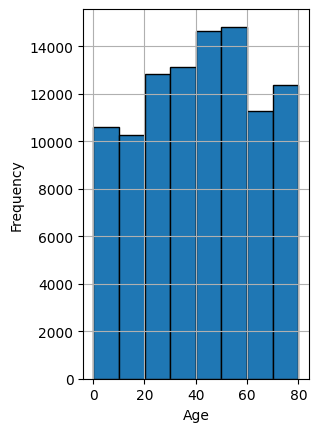

In [ ]:
#uni-variate analysis

plt.subplot(1, 2, 2)
df['age'].hist(bins=8, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')





Text(0, 0.5, 'Frequency')

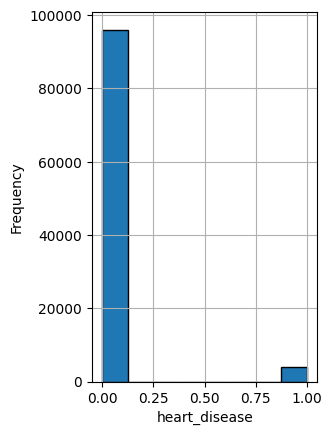

In [ ]:
plt.subplot(1, 2, 2)
df['heart_disease'].hist(bins=8, edgecolor='black')
plt.xlabel('heart_disease')
plt.ylabel('Frequency')

<Axes: ylabel='age'>

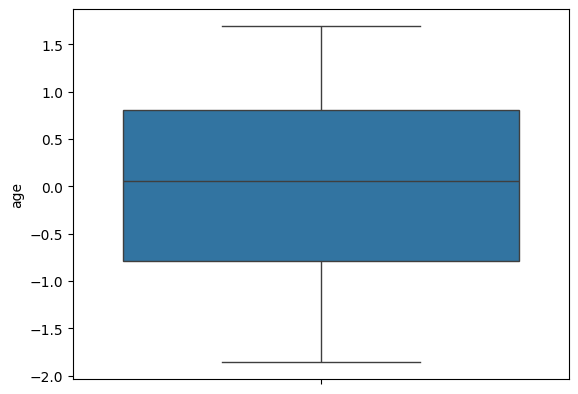

In [ ]:
sns.boxplot(df['age'])

<Axes: >

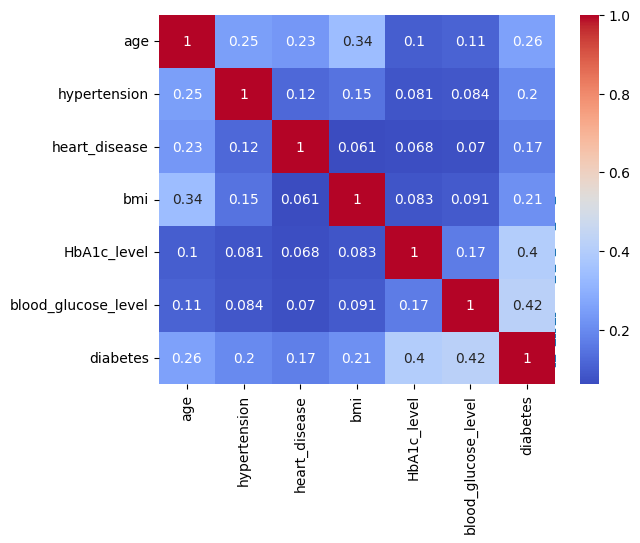

In [ ]:
#Bi-variate Analysis

# here we have selected numerical columns only
numerical_df = df.select_dtypes(include='number')
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='pca-one', ylabel='pca-two'>

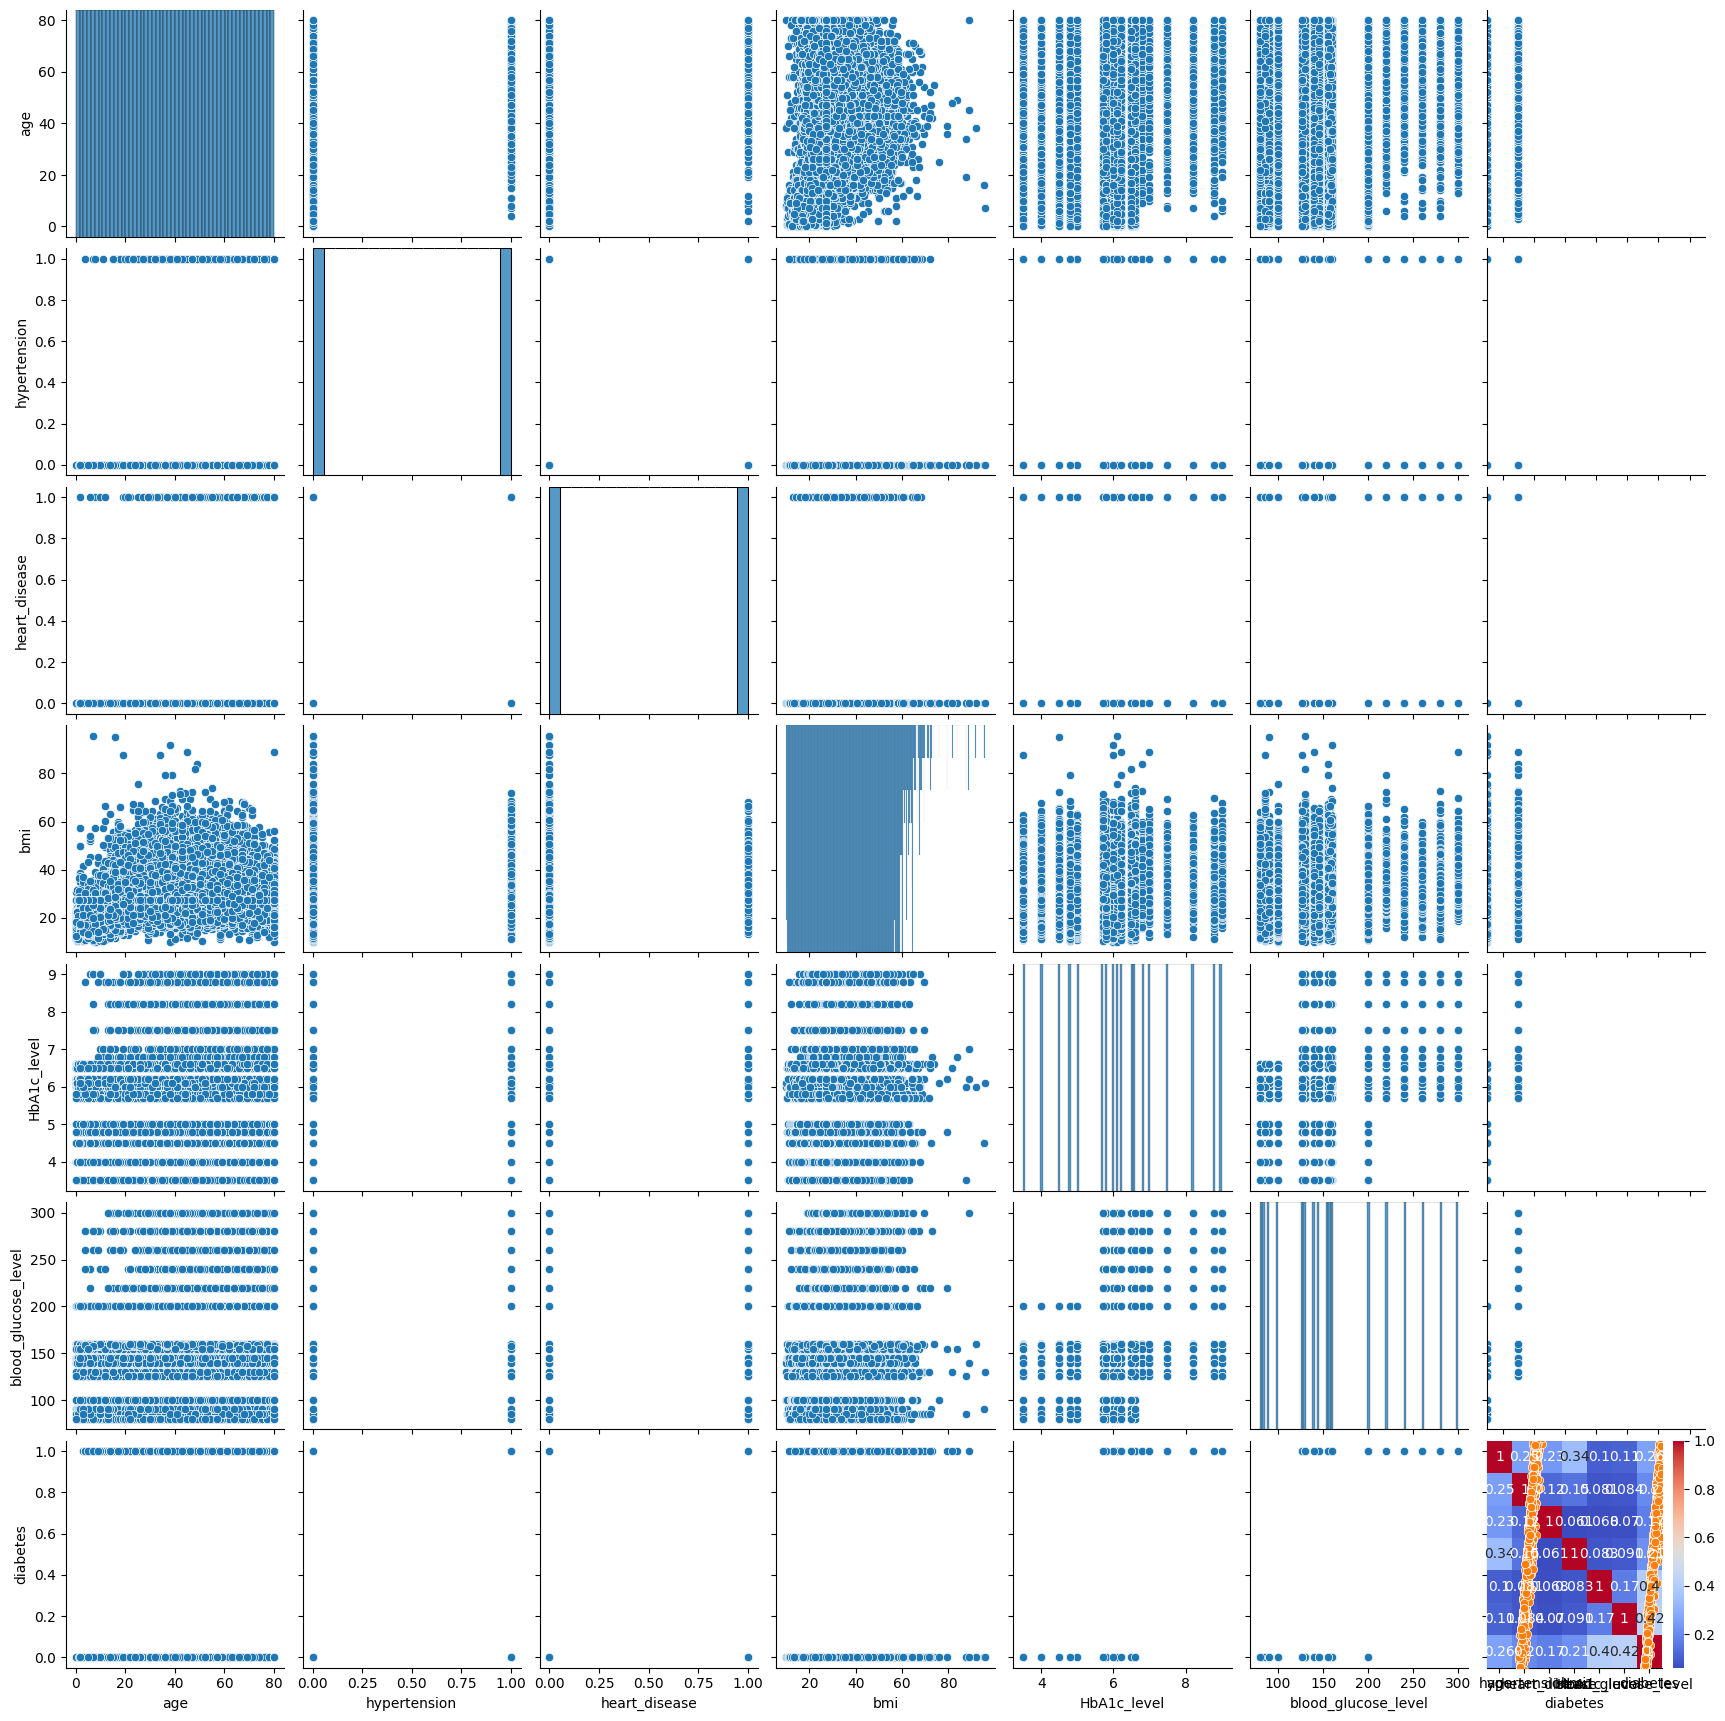

In [ ]:
#Multi-variate anlaysis

sns.pairplot(df)

# Calculate correlation for numerical columns only
numerical_df = df.select_dtypes(include='number')
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.select_dtypes(include=[np.number]))
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
sns.scatterplot(x='pca-one', y='pca-two', data=df)

**Visualization of All the Attributes**

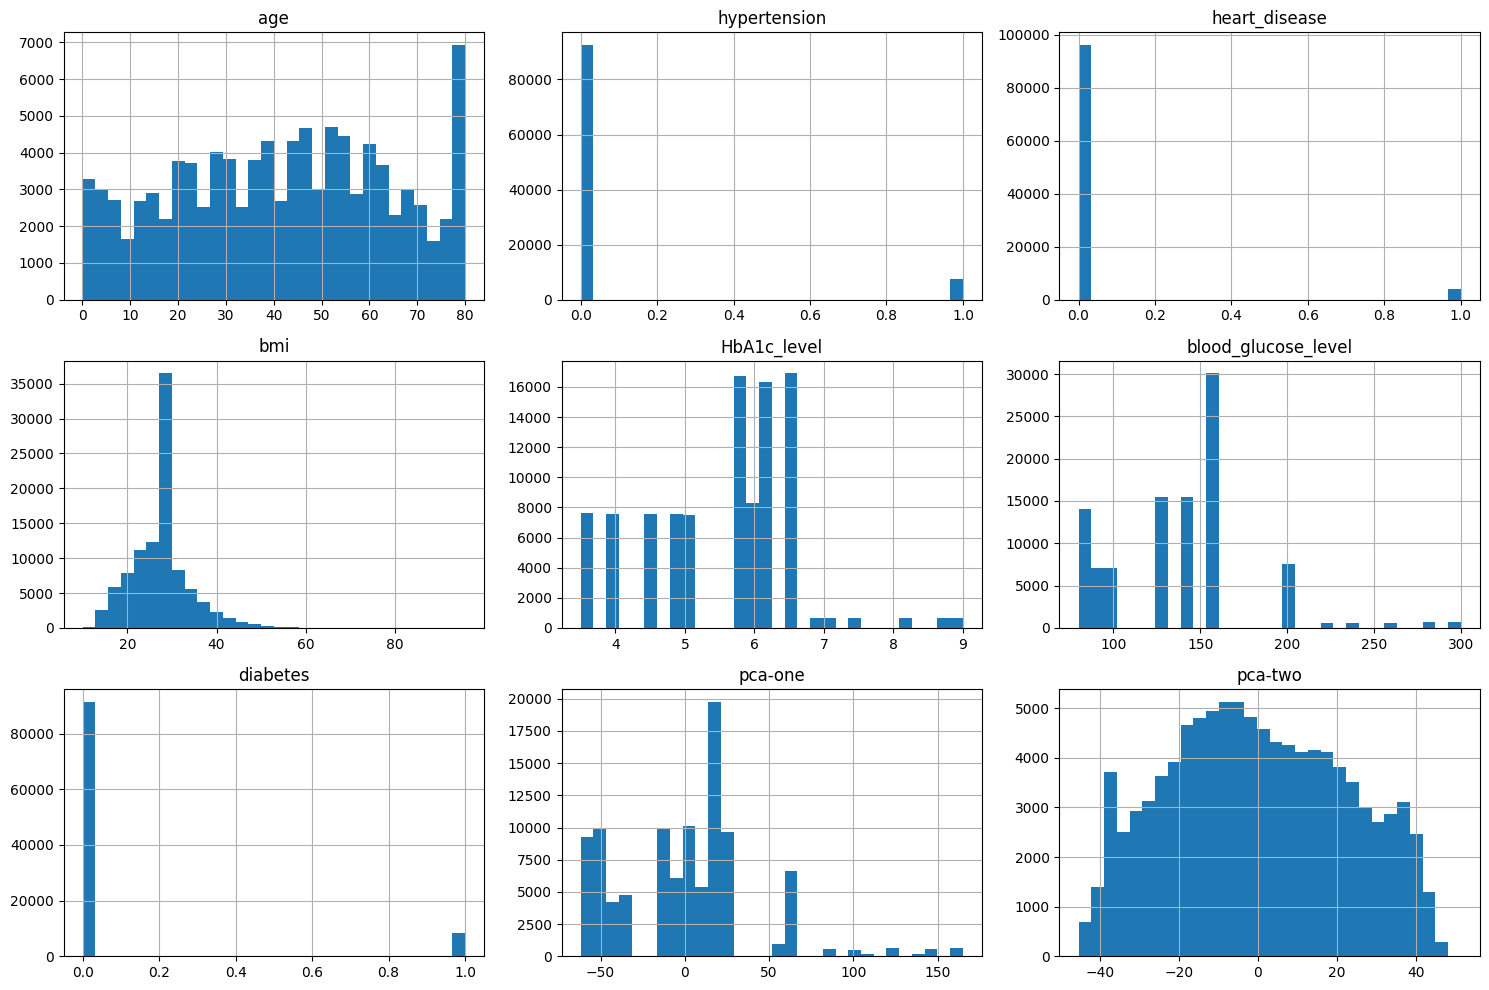

In [ ]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

**Categorical And Numerical Encoding**

In [ ]:
## to preprocess both kind of columns separatly

## in numerical columsn we do preprocessing like missing values (mean, median), handle outliers, scaling
## in categorical columns we do preprocessing like missing values (mode), encoding

categorical_columns = ['gender','hypertension','heart_disease','smoking_history']
numerical_columns = ['age','bmi','HbA1c_level','blood_glucose_level']


In [ ]:
df[numerical_columns]

,age,bmi,HbA1c_level,blood_glucose_level
0,80.0,25.19,6.6,140
1,54.0,27.32,6.6,80
2,28.0,27.32,5.7,158
3,36.0,23.45,5.0,155
4,76.0,20.14,4.8,155
...,...,...,...,...
99995,80.0,27.32,6.2,90
99996,2.0,17.37,6.5,100
99997,66.0,27.83,5.7,155
99998,24.0,35.42,4.0,100


**Preprocessing of Numerical Columns**


In [ ]:
df[numerical_columns].corr()

,age,bmi,HbA1c_level,blood_glucose_level
age,1.000000,0.337396,0.101354,0.110672
bmi,0.337396,1.000000,0.082997,0.091261
HbA1c_level,0.101354,0.082997,1.000000,0.166733
blood_glucose_level,0.110672,0.091261,0.166733,1.000000


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,pca-one,pca-two
0,Female,80.0,0,1,never,25.19,6.6,140,0,5.251900,-37.363967
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,-56.753510,-17.189517
2,Male,28.0,0,0,never,27.32,5.7,158,0,18.640822,15.535981
3,Female,36.0,0,0,current,23.45,5.0,155,0,16.284039,7.748637
4,Male,76.0,1,1,current,20.14,4.8,155,0,19.741823,-31.532875


**Preprocessing of Categorical Columns**

In [ ]:
df[categorical_columns]

,gender,hypertension,heart_disease,smoking_history
0,Female,0,1,never
1,Female,0,0,No Info
2,Male,0,0,never
3,Female,0,0,current
4,Male,1,1,current
...,...,...,...,...
99995,Female,0,0,No Info
99996,Female,0,0,No Info
99997,Male,0,0,former
99998,Female,0,0,never


In [ ]:
df[df['gender'] == 'Other']
# df['gender'].value_counts()
#df.drop(columns=['gender'], inplace=True)

# there is only 18 out of 100000 samples for other category of gender in our dataset and all of them have no diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,pca-one,pca-two
12669,Other,10.0,0,0,not current,14.09,5.0,140,0,-1.108435,33.136073
14838,Other,19.0,0,0,No Info,27.32,5.7,158,0,17.849538,24.450863
16702,Other,39.0,0,0,not current,31.24,6.2,85,0,-53.024300,-2.290891
18691,Other,10.0,0,0,not current,16.59,6.1,160,0,18.860217,34.658775
23266,Other,23.0,0,0,No Info,24.23,6.1,140,0,0.220652,19.200539
31985,Other,53.0,0,0,No Info,27.32,6.6,160,0,22.834773,-9.052196
33805,Other,45.0,0,0,never,27.32,4.0,159,0,21.123805,-1.207699
34929,Other,47.0,0,0,never,36.76,6.6,90,0,-47.240744,-10.344046
35006,Other,47.0,0,0,never,36.76,3.5,200,0,62.300142,-0.505906
40337,Other,18.0,0,0,not current,30.19,6.1,90,0,-49.910078,19.066730


**One Hot Encoding on Categorical Column**

In [ ]:
## one hot encoding
# pd.get_dummies(df['gender'])

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)  # sparse=False ensures the output is a dense array

encoded_data = ohe.fit_transform(df[['gender']])

encoded_df = pd.DataFrame(encoded_data, columns=['Female','Male','Other'])

encoded_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Female,Male,Other
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [ ]:
# Concatenate with original DataFrame
df2 = pd.concat([df, encoded_df], axis=1)

In [ ]:
df['smoking_history'].value_counts()  #just checking a categorical column after preprocessing

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

**One Hot Encoding on categorical Column**

In [ ]:

ohe = OneHotEncoder(sparse=False)  # sparse=False ensures the output is a dense array

encoded_data = ohe.fit_transform(df[['smoking_history']])

encoded_smoking = pd.DataFrame(encoded_data, columns = ['0','1','2','3','4','5'] )

encoded_smoking.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df3 = pd.concat([df2, encoded_smoking], axis=1)
df3.head()

df = df3

**Data Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,pca-one,pca-two,Female,Male,Other,0,1,2,3,4,5
0,Female,1.692704,0,1,never,-0.321056,1.001706,0.047704,0,5.251900,-37.363967,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Female,0.538006,0,0,No Info,-0.000116,1.001706,-1.426210,0,-56.753510,-17.189517,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Male,-0.616691,0,0,never,-0.000116,0.161108,0.489878,0,18.640822,15.535981,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Female,-0.261399,0,0,current,-0.583232,-0.492690,0.416183,0,16.284039,7.748637,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Male,1.515058,1,1,current,-1.081970,-0.679490,0.416183,0,19.741823,-31.532875,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Checking if our Dataset is Imbalance**

In [ ]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

**We can see our dataset is severly imbalanced 91500 peoples has no diabetes while only 8500 people has diabetes out of 100000. Now we will Apply SMOTE to balance it.**

In [ ]:
from sklearn.model_selection import train_test_split

# Define X by dropping the target variable 'diabetes'
X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



**Why Use stratify?**
**Ensures that the train-test split maintains the same proportion of each class in the target.**

**Applying SMOTE to balance the Imbalance Dataset**

In [ ]:
#HERE COMES OUR SUPERSTAR SMOTE!!!
from imblearn.over_sampling import SMOTE



non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns

X_train_encoded = pd.get_dummies(X_train, columns=non_numeric_columns)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

**Applying Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# Use the SMOTE resampled training data
lr.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Prediction**

In [ ]:



# Identify columns with non-numerical data in X_test
non_numeric_columns_test = X_test.select_dtypes(exclude=['number']).columns

# One-hot encode non-numerical columns in X_test
X_test_encoded = pd.get_dummies(X_test, columns=non_numeric_columns_test)

# Now predict using the encoded test data
lr_predictions = lr.predict(X_test_encoded)


**Evaluate Classification Matrix**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_classification(y_test, y_pred):
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    # Print metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}\n')

    print(f'Confusion Matrix:\n {cm}   \n')


    print(f'Classification Report:\n{cr}')

    # Return metrics as a dictionary (optional)
    metrics_dict = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Confusion Matrix': cm,
        'Classification Report': cr
    }

    return metrics_dict

evaluate_classification(lr_predictions, y_test)


Accuracy: 0.9133
Precision: 0.8306
Recall: 0.4942
F1-score: 0.6197

Confusion Matrix:
 [[16855   288]
 [ 1445  1412]]   

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     17143
           1       0.83      0.49      0.62      2857

    accuracy                           0.91     20000
   macro avg       0.88      0.74      0.79     20000
weighted avg       0.91      0.91      0.90     20000



{'Accuracy': 0.91335,
 'Precision': 0.8305882352941176,
 'Recall': 0.4942247112355618,
 'F1-score': 0.619705946894887,
 'Confusion Matrix': array([[16855,   288],
        [ 1445,  1412]]),
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95     17143\n           1       0.83      0.49      0.62      2857\n\n    accuracy                           0.91     20000\n   macro avg       0.88      0.74      0.79     20000\nweighted avg       0.91      0.91      0.90     20000\n'}

**Application of XG Boost Classifier to increase Performance**

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
# Assuming X_train_smote and y_train_smote are your resampled training data
xgb_model.fit(X_train_smote, y_train_smote)  # Use y_train_smote for consistency with SMOTE
y_pred_xgb = xgb_model.predict(X_test_encoded)

evaluate_classification(y_test, y_pred_xgb)

Accuracy: 0.9683
Precision: 0.8802
Recall: 0.7259
F1-score: 0.7956

Confusion Matrix:
 [[18132   168]
 [  466  1234]]   

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.88      0.73      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.93      0.86      0.89     20000
weighted avg       0.97      0.97      0.97     20000



{'Accuracy': 0.9683,
 'Precision': 0.8801711840228246,
 'Recall': 0.7258823529411764,
 'F1-score': 0.7956157317859446,
 'Confusion Matrix': array([[18132,   168],
        [  466,  1234]]),
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98     18300\n           1       0.88      0.73      0.80      1700\n\n    accuracy                           0.97     20000\n   macro avg       0.93      0.86      0.89     20000\nweighted avg       0.97      0.97      0.97     20000\n'}